In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:



# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.tools import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [3]:
names=['id','diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
copied_path =  r'C:/Users/MACWAN/Documents/data/wdbc_data.csv' #remove ‘content/’ from path then use 
data = pd.read_csv(copied_path,names=names)



In [4]:
y = data.diagnosis 
data = data.drop(['id'],axis = 1) #remove first column as id


In [5]:
# quick look to data
data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.shape # (569, 31)
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
def nullcounts(ser):
    return ser.isnull().sum()


def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max','std'],
                    numeric_only=True, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)
custom_describe(data)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
nullcounts,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sum,8038.429000,10975.810000,52330.380000,372631.900000,54.829000,59.370020,50.526811,27.834994,103.081100,35.731840,...,9257.169000,14610.340000,61031.630000,501051.800000,75.317730,144.676810,154.875247,65.210941,165.053000,47.765170
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
median,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061


In [8]:
data.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

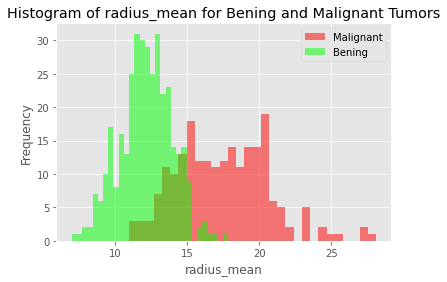

Most frequent malignant radius_mean mean is:  20.101999999999997


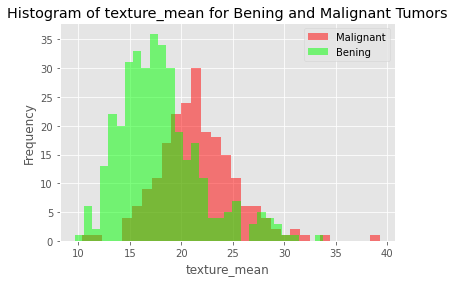

Most frequent malignant texture_mean mean is:  20.976666666666667


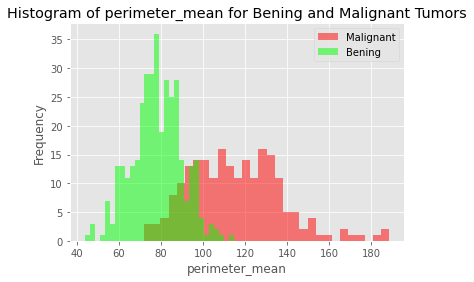

Most frequent malignant perimeter_mean mean is:  106.88


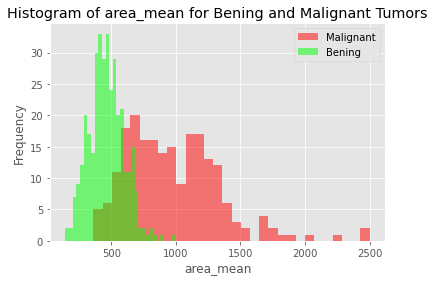

Most frequent malignant area_mean mean is:  646.8533333333334


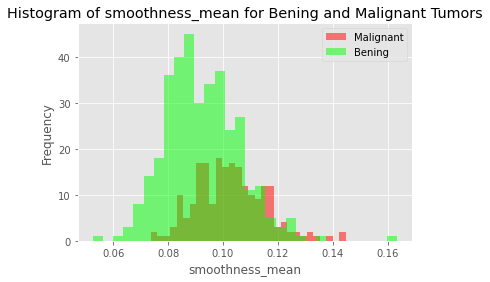

Most frequent malignant smoothness_mean mean is:  0.09737333333333333


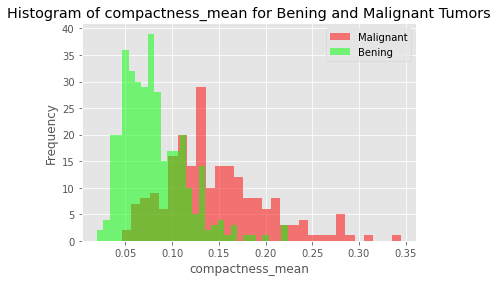

Most frequent malignant compactness_mean mean is:  0.12587666666666666


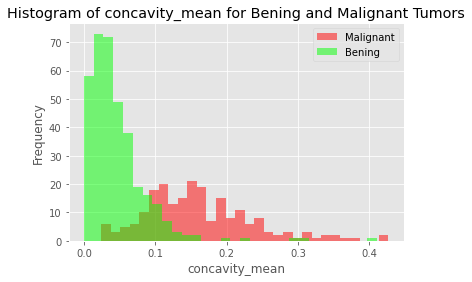

Most frequent malignant concavity_mean mean is:  0.144826


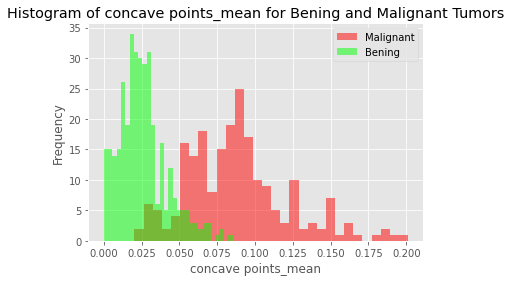

Most frequent malignant concave points_mean mean is:  0.08663633333333333


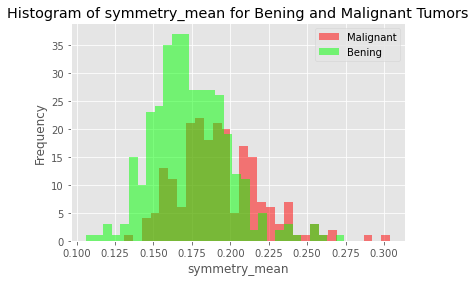

Most frequent malignant symmetry_mean mean is:  0.17698666666666668


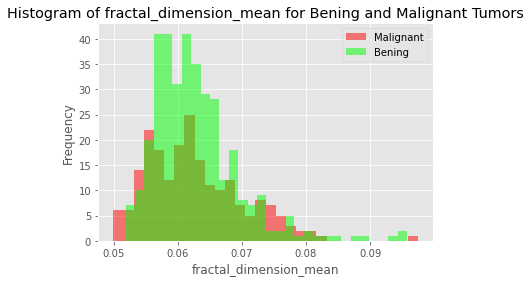

Most frequent malignant fractal_dimension_mean mean is:  0.06103866666666667


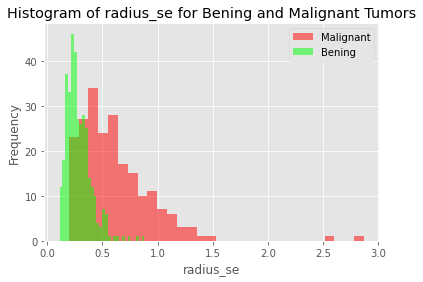

Most frequent malignant radius_se mean is:  0.3724133333333334


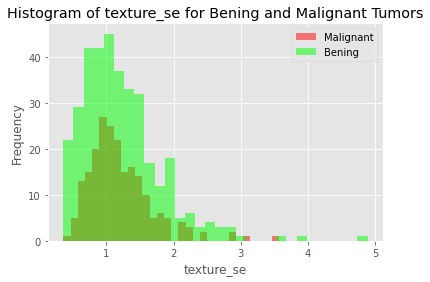

Most frequent malignant texture_se mean is:  0.8964166666666666


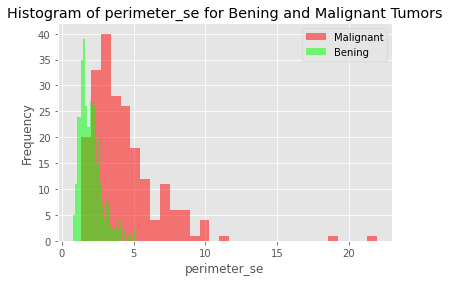

Most frequent malignant perimeter_se mean is:  2.7104


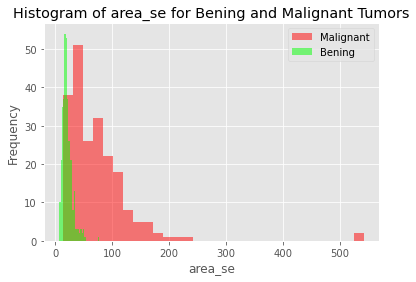

Most frequent malignant area_se mean is:  31.597


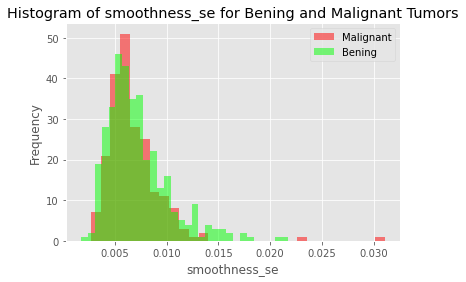

Most frequent malignant smoothness_se mean is:  0.0055133000000000005


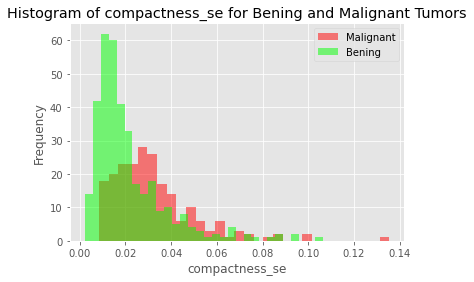

Most frequent malignant compactness_se mean is:  0.025352399999999997


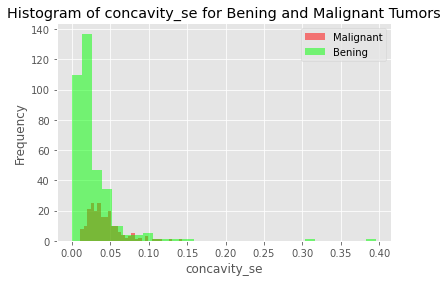

Most frequent malignant concavity_se mean is:  0.024289


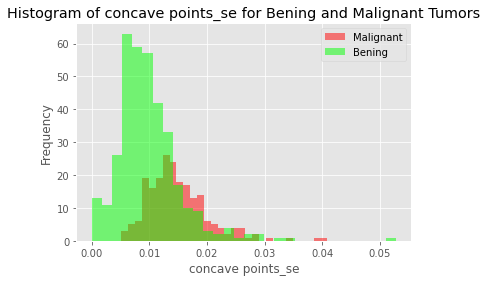

Most frequent malignant concave points_se mean is:  0.012319199999999999


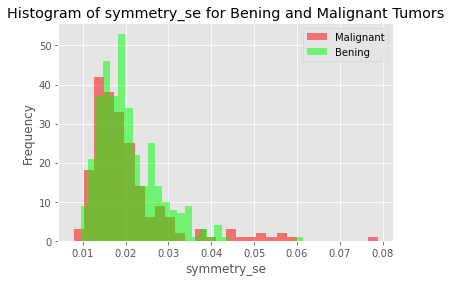

Most frequent malignant symmetry_se mean is:  0.012619866666666667


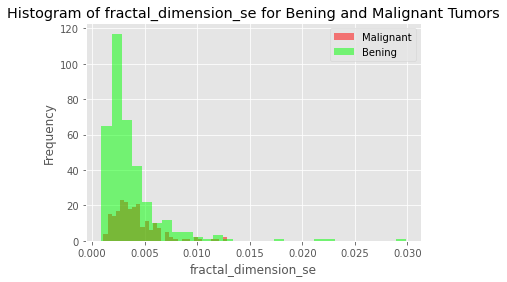

Most frequent malignant fractal_dimension_se mean is:  0.0026540666666666664


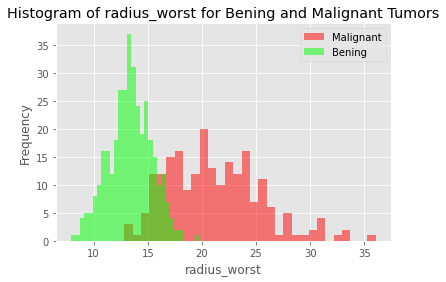

Most frequent malignant radius_worst mean is:  19.8


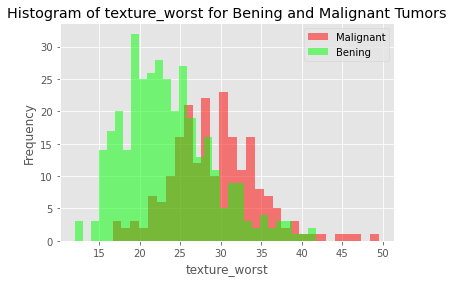

Most frequent malignant texture_worst mean is:  29.818


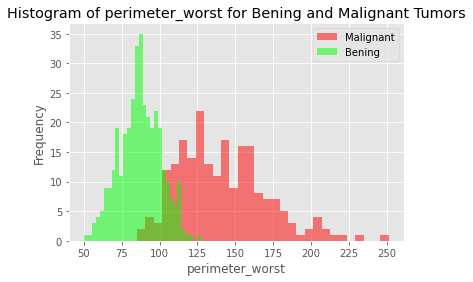

Most frequent malignant perimeter_worst mean is:  123.85666666666665


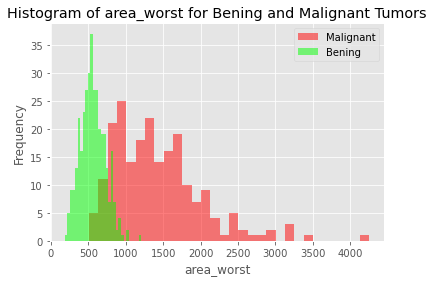

Most frequent malignant area_worst mean is:  882.69


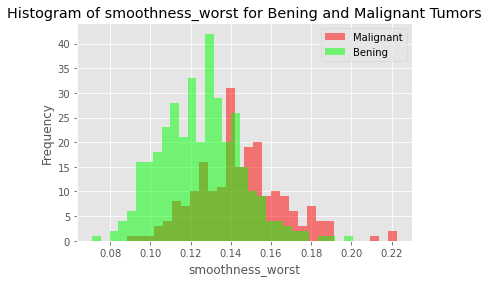

Most frequent malignant smoothness_worst mean is:  0.13749266666666668


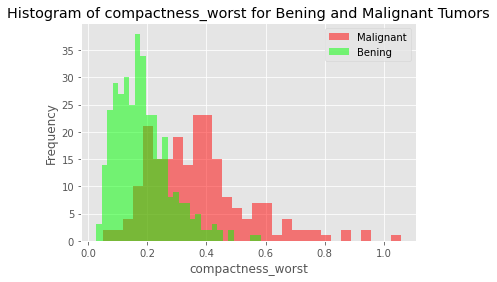

Most frequent malignant compactness_worst mean is:  0.35331700000000005


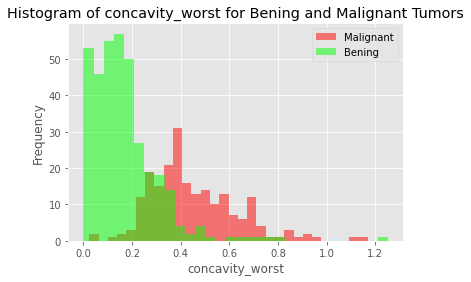

Most frequent malignant concavity_worst mean is:  0.367786


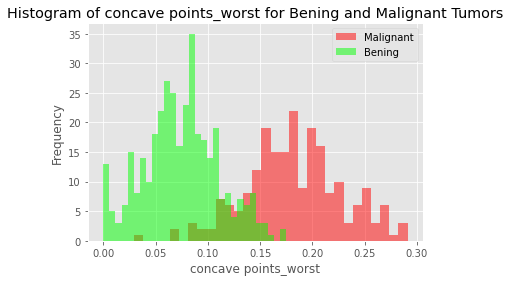

Most frequent malignant concave points_worst mean is:  0.17746233333333333


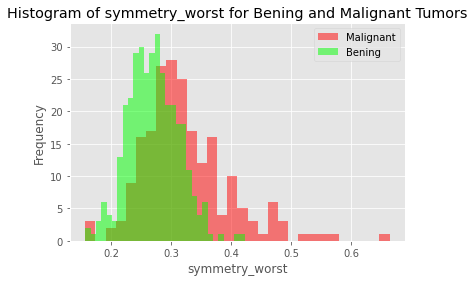

Most frequent malignant symmetry_worst mean is:  0.29178


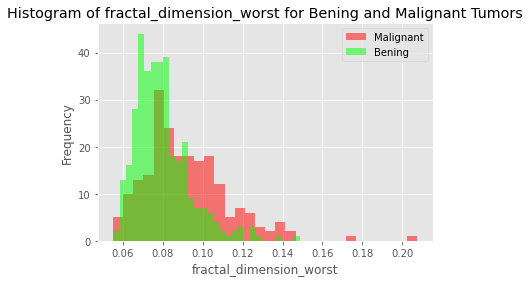

Most frequent malignant fractal_dimension_worst mean is:  0.07536799999999999


In [9]:
def histogram_gen(feature,data):
  x_m=data[data["diagnosis"] == "M"][feature]
  x_b=data[data["diagnosis"] == "B"][feature]
  m = plt.hist(x_m,bins=30,fc = (1,0,0,0.5),label = "Malignant")
  b = plt.hist(x_b,bins=30,fc = (0,1,0,0.5),label = "Bening")
  plt.legend()
  plt.xlabel(feature)
  plt.ylabel("Frequency")
  plt.title("Histogram of "+feature+" for Bening and Malignant Tumors")
  fig1 = plt.gcf()
  plt.show()
  frequent_malignant = m[0].max()
  index_frequent_malignant = list(m[0]).index(frequent_malignant)
  most_frequent_malignant = m[1][index_frequent_malignant]
  print("Most frequent malignant "+feature+" mean is: ",most_frequent_malignant)
  #fig1.savefig("/content/sample_data/project2_output/"+feature+".png",dpi=100)
for feature in names[2:]:
  histogram_gen(feature,data)

In [10]:
columns_need_to_drop=['concavity_se', 'fractal_dimension_se', 'texture_se']

In [11]:
def outliers(feature,data):
  data_bening = data[data["diagnosis"] == "B"]
  data_malignant = data[data["diagnosis"] == "M"]
  #for class B 
  desc = data_bening[feature].describe()
  Q1 = desc[4]
  Q3 = desc[6]
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  print("For Feature "+feature+" Anything outside this range is an outlier for class B rows: (", lower_bound ,",", upper_bound,")")
  data_bening[data_bening[feature] < lower_bound][feature]
  print("Outliers: ",data_bening[(data_bening[feature] < lower_bound) | (data_bening[feature] > upper_bound)][feature].values)
  #for class M
  desc = data_malignant[feature].describe()
  Q1 = desc[4]
  Q3 = desc[6]
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  print("For Feature "+feature+" Anything outside this range is an outlier for class M: (", lower_bound ,",", upper_bound,")")
  data_malignant[data_malignant[feature] < lower_bound][feature]
  print("Outliers: ",data_malignant[(data_malignant[feature] < lower_bound) | (data_malignant[feature] > upper_bound)][feature].values)

In [12]:
for feature in names[2:]:
  outliers(feature,data)

For Feature radius_mean Anything outside this range is an outlier for class B rows: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]
For Feature radius_mean Anything outside this range is an outlier for class M: ( 8.302500000000002 , 26.362499999999997 )
Outliers:  [27.22 28.11 27.42]
For Feature texture_mean Anything outside this range is an outlier for class B rows: ( 8.235 , 26.675000000000004 )
Outliers:  [27.08 33.81 27.85 28.21 28.23 30.72 29.29 28.2  26.99 28.14 29.97 28.06
 29.43 28.92 27.61 27.88 27.15 29.37]
For Feature texture_mean Anything outside this range is an outlier for class M: ( 12.67125 , 30.42125 )
Outliers:  [10.38 11.89 32.47 39.28 33.56 31.12 30.62]
For Feature perimeter_mean Anything outside this range is an outlier for class B rows: ( 48.02500000000002 , 108.94499999999998 )
Outliers:  [ 43.79 114.6   47.98  47.92]
For Feature perimeter_mean Anything outside this range is an outlier for class M: ( 51.974999999999994 , 176.69500000000002 )
Outl

For Feature area_worst Anything outside this range is an outlier for class B rows: ( 112.75000000000006 , 1004.3499999999999 )
Outliers:  [1032. 1009. 1210.]
For Feature area_worst Anything outside this range is an outlier for class M: ( -143.37500000000023 , 2826.425 )
Outliers:  [3216. 2944. 3432. 2906. 3234. 3143. 4254.]
For Feature smoothness_worst Anything outside this range is an outlier for class B rows: ( 0.0696 , 0.1784 )
Outliers:  [0.1902 0.2006 0.185 ]
For Feature smoothness_worst Anything outside this range is an outlier for class M: ( 0.09222500000000002 , 0.19422499999999998 )
Outliers:  [0.2098  0.08822 0.2226  0.2184 ]
For Feature compactness_worst Anything outside this range is an outlier for class B rows: ( -0.06530000000000002 , 0.4075 )
Outliers:  [0.4365 0.4791 0.4193 0.431  0.4402 0.4848 0.5849 0.4082 0.5646 0.4202]
For Feature compactness_worst Anything outside this range is an outlier for class M: ( -0.06058749999999996 , 0.7529124999999999 )
Outliers:  [0.8663

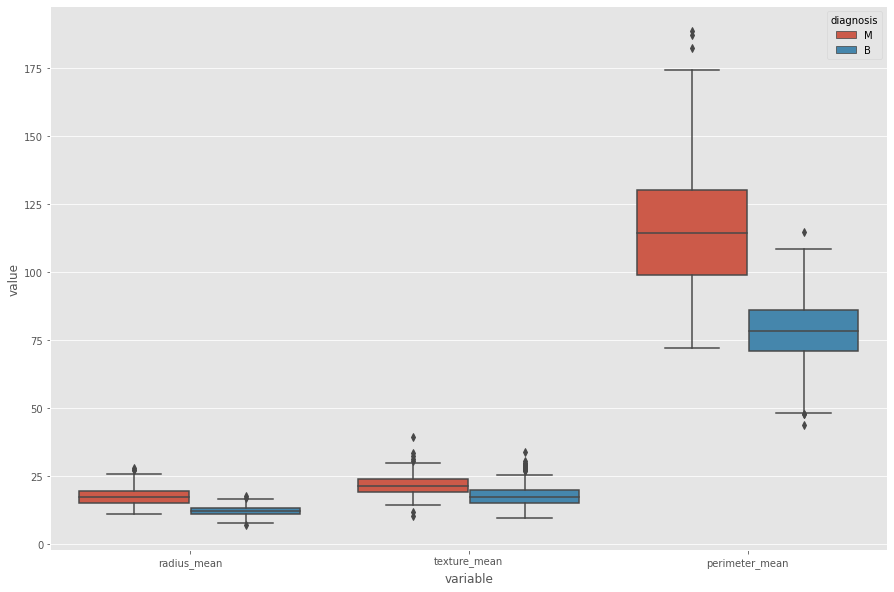

In [13]:
def box_plot(data,names):
  melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = names[2:5])
  plt.figure(figsize = (15,10))
  sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
  plt.show()
box_plot(data,names)

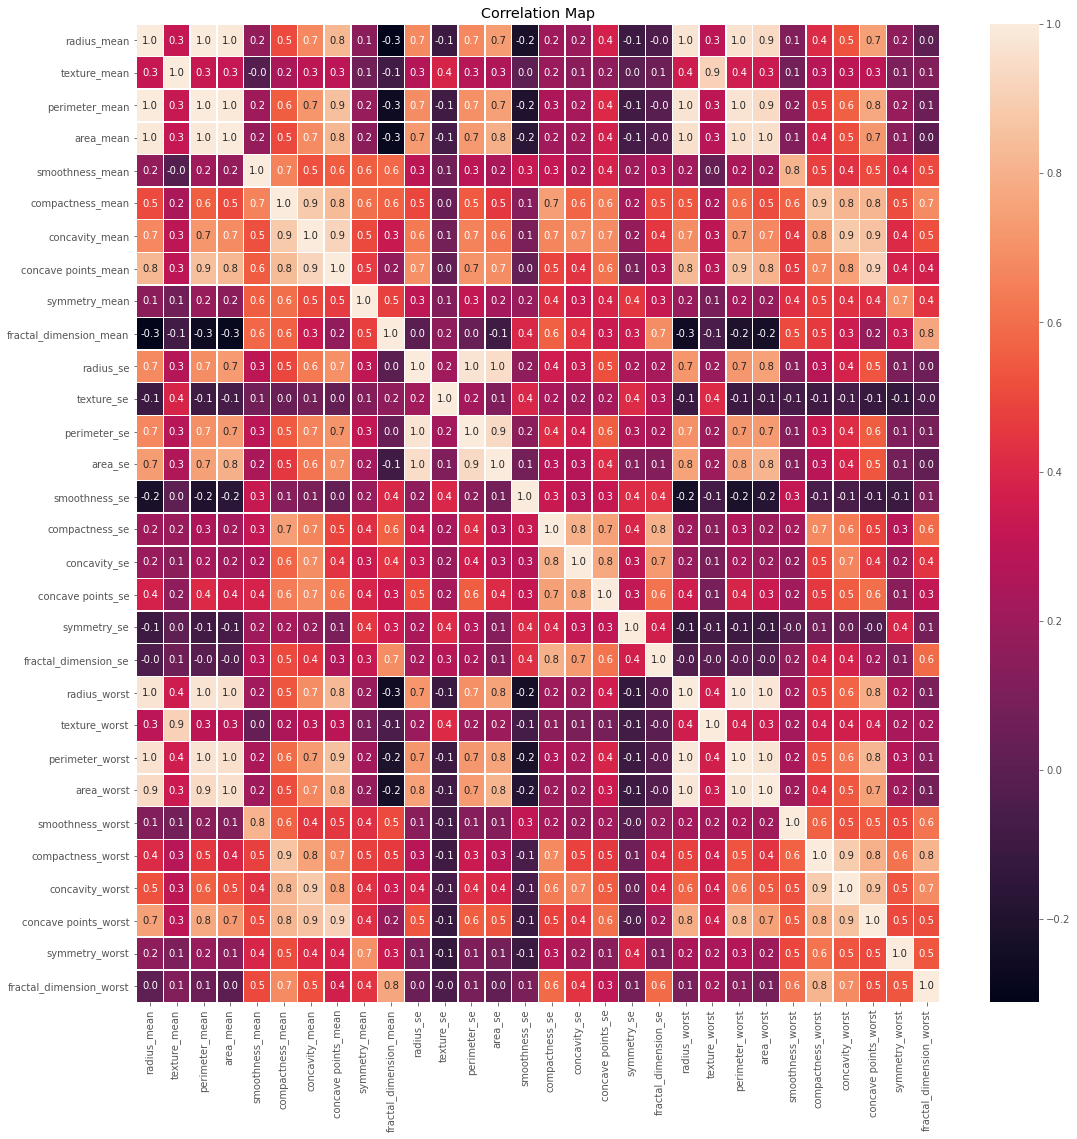

In [16]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [17]:
corr_matrix=data.corr()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop=to_drop+columns_need_to_drop
data = data.drop(to_drop,axis = 1) 

In [18]:
data = data.drop(['diagnosis'],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state=42)

Number of Benign:  71
Number of Malignant :  43


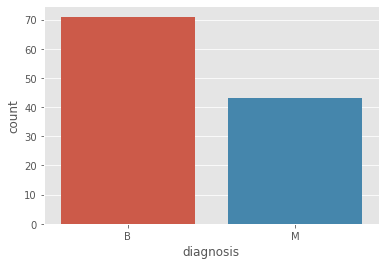

In [19]:
ax = sns.countplot(y_test,label="Count")       # M = 212, B = 357
B, M = y_test.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [20]:
#random forest classifier with n_estimators=10 (default)
n_trees=[5,7,10,15,25,30,100]
for n_t in n_trees:
  clf_rf = RandomForestClassifier(n_estimators=n_t, random_state=43)      
  clr_rf = clf_rf.fit(x_train,y_train)
  ac = accuracy_score(y_train,clf_rf.predict(x_train))
  print('Train Data','number of estimators:',n_t,'Accuracy is with : ',ac)

  ac = accuracy_score(y_test,clf_rf.predict(x_test))
  print('Test Data  number of estimators:',n_t,'Accuracy is with : ',ac)
 # cm = confusion_matrix(y_test,clf_rf.predict(x_test))
 # sns.heatmap(cm,annot=True,fmt="d")

Train Data number of estimators: 5 Accuracy is with :  0.9934065934065934
Test Data  number of estimators: 5 Accuracy is with :  0.9473684210526315
Train Data number of estimators: 7 Accuracy is with :  0.9934065934065934
Test Data  number of estimators: 7 Accuracy is with :  0.9473684210526315
Train Data number of estimators: 10 Accuracy is with :  0.9978021978021978
Test Data  number of estimators: 10 Accuracy is with :  0.956140350877193
Train Data number of estimators: 15 Accuracy is with :  1.0
Test Data  number of estimators: 15 Accuracy is with :  0.956140350877193
Train Data number of estimators: 25 Accuracy is with :  1.0
Test Data  number of estimators: 25 Accuracy is with :  0.9736842105263158
Train Data number of estimators: 30 Accuracy is with :  1.0
Test Data  number of estimators: 30 Accuracy is with :  0.9736842105263158
Train Data number of estimators: 100 Accuracy is with :  1.0
Test Data  number of estimators: 100 Accuracy is with :  0.9736842105263158


In [21]:
def feature_importance(clf_rf,x_train):
  #clf_rf.predict_proba(x_test)
  importances = clf_rf.feature_importances_
  std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
              axis=0)
  indices = np.argsort(importances)[::-1]

  # Print the feature ranking
  print("Feature ranking:")

  for f in range(x_train.shape[1]):
      print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

  # Plot the impurity-based feature importances of the forest
  plt.figure()
  plt.title("Feature importances")
  plt.bar(range(x_train.shape[1]), importances[indices],
          color="r", yerr=std[indices], align="center")
  plt.xticks(range(x_train.shape[1]), indices)
  plt.xlim([-1, x_train.shape[1]])
  plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
len(data.columns)

17

In [24]:
a=[119513,'N',31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.89,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5
]
len(a)

35

In [25]:
#random forest classifier with n_estimators=10 (default)
clf_tree = DecisionTreeClassifier(random_state=43)      
clr_tree = clf_tree.fit(x_train,y_train)
ac = accuracy_score(y_train,clf_tree.predict(x_train))
print('Train Data','Accuracy is with : ',ac)

ac = accuracy_score(y_test,clf_tree.predict(x_test))
print('Test Data' ,'Accuracy is with : ',ac)
# cm = confusion_matrix(y_test,clf_rf.predict(x_test))
# sns.heatmap(cm,annot=True,fmt="d")

Train Data Accuracy is with :  1.0
Test Data Accuracy is with :  0.9298245614035088


In [26]:

print("Important features by decision tree")
a=[]
for b,c in zip(data.columns,clf_tree.feature_importances_):
  a.append([b,abs(c)])
sort_list=sorted(a,key=lambda x :x[1],reverse=True)
for pos, coff in enumerate(sort_list):
  print(pos,coff[0],coff[1])

Important features by decision tree
0 concavity_mean 0.5685696124215408
1 radius_mean 0.17670204097821904
2 smoothness_worst 0.05499584206682734
3 symmetry_se 0.0473901509404468
4 texture_mean 0.04508471475079182
5 radius_se 0.032535748645986205
6 concavity_worst 0.024628227900914436
7 symmetry_worst 0.018656613581384197
8 fractal_dimension_mean 0.016175503732064826
9 compactness_worst 0.006275775506544738
10 smoothness_mean 0.004706831629908554
11 symmetry_mean 0.004278937845371417
12 compactness_mean 0.0
13 smoothness_se 0.0
14 compactness_se 0.0
15 concave points_se 0.0
16 fractal_dimension_worst 0.0


In [27]:
import xgboost as xgb

In [28]:
# Train the model, this will take a few minutes to run
bst = xgb.XGBClassifier(
    objective='reg:logistic'
)

bst.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:

print("Important features by Xgboost")
a=[]
for b,c in zip(data.columns,bst.feature_importances_):
  a.append([b,abs(c)])
sort_list=sorted(a,key=lambda x :x[1],reverse=True)
for pos, coff in enumerate(sort_list):
  print(pos,coff[0],coff[1])


Important features by Xgboost
0 concavity_mean 0.4181963
1 radius_mean 0.14815912
2 compactness_worst 0.12532166
3 concavity_worst 0.06452234
4 smoothness_mean 0.039328523
5 texture_mean 0.031737015
6 smoothness_worst 0.026840419
7 fractal_dimension_mean 0.021702355
8 radius_se 0.021553412
9 symmetry_worst 0.020762011
10 compactness_se 0.018091086
11 symmetry_se 0.016894074
12 smoothness_se 0.014787308
13 compactness_mean 0.0136771565
14 fractal_dimension_worst 0.009433691
15 symmetry_mean 0.0045286557
16 concave points_se 0.0044648554


In [30]:
# Get predictions on the test set and print the accuracy score
y_pred = bst.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc, '\n')

0.9736842105263158 



In [31]:
# Save the model so we can deploy it
bst.save_model('model.bst')

Train Data Accuracy is  :  0.9340659340659341
Test Data Accuracy is :  0.956140350877193


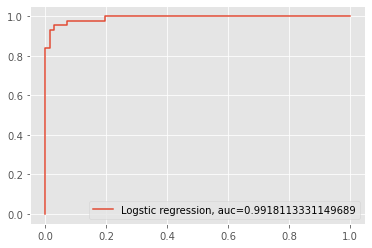

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
ac = accuracy_score(y_train,clf.predict(x_train))
print('Train Data','Accuracy is  : ',ac)

ac = accuracy_score(y_test,clf.predict(x_test))
print('Test Data Accuracy is : ',ac)
#clf.predict_proba(x_test)
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='M')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logstic regression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [33]:
print("Important features by Logistic Regression")
a=[]
for b,c in zip(data.columns,clf.coef_[0]):
  a.append([b,abs(c)])
sort_list=sorted(a,key=lambda x :x[1],reverse=True)
for pos, coff in enumerate(sort_list):
  print(pos,coff[0],coff[1])

Important features by Logistic Regression
0 concavity_worst 3.2847038996801503
1 compactness_worst 2.390036551320389
2 symmetry_worst 1.715943610098229
3 radius_se 1.6560997416616396
4 concavity_mean 0.9103701834730739
5 radius_mean 0.8492826357793687
6 smoothness_worst 0.7959380097346869
7 compactness_mean 0.5554111441587887
8 symmetry_mean 0.4556103084952107
9 smoothness_mean 0.3667002661761466
10 fractal_dimension_worst 0.3548790877108243
11 texture_mean 0.22973271809882218
12 compactness_se 0.1504715215614858
13 fractal_dimension_mean 0.08655300070690213
14 symmetry_se 0.014949132072397103
15 smoothness_se 0.007106321784711278
16 concave points_se 0.0008836966550566853


In [34]:
from sklearn import metrics

def plot_roc(clsf,x_test,y_test):
    rfc_disp = metrics.plot_roc_curve(clsf, x_test, y_test, ax=plt.gca(), alpha=0.8)
    plt.show()

def report(y_test,y_pred):
    print(metrics.classification_report(y_test, y_pred))  
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #print( "Confusion matrix: \n",confusion_matrix(y_test,y_pred))

def eval_confusion_matrix(clsf,x_test,y_test):
    titles_options = [("Confusion matrix", None)]
    for title, normalize in titles_options:
        disp = metrics.plot_confusion_matrix(clsf, x_test, y_test,
                                 display_labels=["M","B"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()
    
def eval_prob(X_train,X_test,y_train,y_test):
    train_probs = clf_rf.predict_proba(X_train)[:,1] 
    probs = clf_rf.predict_proba(X_test)[:, 1]
    train_predictions = clf_rf.predict(X_train)
    print(f'Train ROC AUC Score: {metrics.roc_auc_score(y_train, train_probs)}')
    print(f'Test ROC AUC  Score: {metrics.roc_auc_score(y_test, probs)}')
    

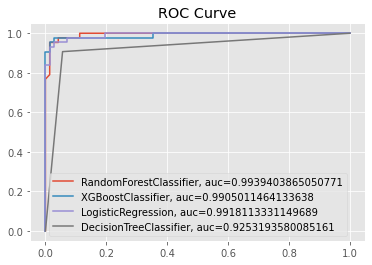

In [35]:
#ROC curve with auc 
y_pred_probar = clr_rf.predict_proba(x_test)[::,1]#randomforest
rfpr, rtpr, _ = metrics.roc_curve(y_test, y_pred_probar,pos_label='M')
rauc = metrics.roc_auc_score(y_test, y_pred_probar)

y_pred_probax = bst.predict_proba(x_test)[::,1]#xgboost
xfpr, xtpr, _ = metrics.roc_curve(y_test, y_pred_probax,pos_label='M')
xauc = metrics.roc_auc_score(y_test, y_pred_probax)

y_pred_probal = clf.predict_proba(x_test)[::,1]#LogisticRegression
lfpr, ltpr, _ = metrics.roc_curve(y_test, y_pred_probal,pos_label='M')
lauc = metrics.roc_auc_score(y_test, y_pred_probal)

y_pred_probad = clf_tree.predict_proba(x_test)[::,1]#DecisionTreeClassifier
dfpr, dtpr, _ = metrics.roc_curve(y_test, y_pred_probad,pos_label='M')
dauc = metrics.roc_auc_score(y_test, y_pred_probad)

plt.plot(rfpr,rtpr,label="RandomForestClassifier, auc="+str(rauc))
plt.plot(xfpr,xtpr,label="XGBoostClassifier, auc="+str(xauc))
plt.plot(lfpr,ltpr,label="LogisticRegression, auc="+str(lauc))
plt.plot(dfpr,dtpr,label="DecisionTreeClassifier, auc="+str(dauc))
plt.title("ROC Curve")
plt.legend(loc=8)
plt.show()

RandomFoestClassifier
Confusion matrix
[[70  1]
 [ 2 41]]


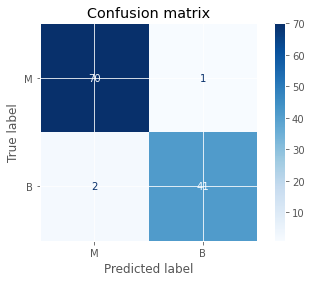

In [36]:
print("RandomFoestClassifier")
eval_confusion_matrix(clr_rf, x_test, y_test)

XGBoostClassifier
Confusion matrix
[[69  2]
 [ 1 42]]


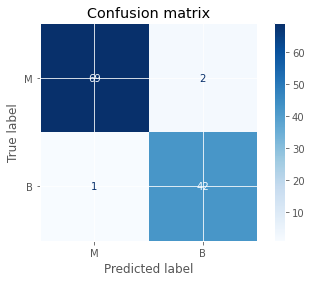

In [37]:
print("XGBoostClassifier")
eval_confusion_matrix(bst, x_test, y_test)

In [38]:
report(y_test,clf_rf.predict(x_test))#report for Random forest

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158


In [39]:
report(y_test,bst.predict(x_test))#report for XGClassifier 

              precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
           M       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158
